In [1]:
!pip install -U -q PyDrive2

In [ ]:

from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

from sklearn.model_selection import GridSearchCV


In [2]:
from pydrive2.auth import GoogleAuth

from pydrive2.drive import GoogleDrive

from google.colab import auth

from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

In [4]:
#https://drive.google.com/file/d/1FEnOwj72Ii1COdTOq9a8eY9VvS5j9auI/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1FEnOwj72Ii1COdTOq9a8eY9VvS5j9auI'})

In [5]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [6]:
fileDownloaded.GetContentFile('Sleep_health_and_lifestyle_dataset.csv')
# Load the dataset
file_path = 'Sleep_health_and_lifestyle_dataset.csv'  # Update with your file path
df = pd.read_csv(file_path)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
def func(df):

    for column in df.columns:
        print(f"Unique counts for column: {column}")
        print(df[column].unique())
        print()
func(df)

Unique counts for column: Person ID
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 23

In [8]:
df['Gender'] = df['Gender'].map(lambda x: 1 if x == 'Male' else 0)
occupation_mapping = {
    'Software Engineer': 0,
    'Doctor': 1,
    'Sales Representative': 2,
    'Teacher': 3,
    'Nurse': 4,
    'Engineer': 5,
    'Accountant': 6,
    'Scientist': 7,
    'Lawyer': 8,
    'Salesperson': 9,
    'Manager': 10
}
df['Occupation'] = df['Occupation'].map(occupation_mapping)
bmi_mapping = {
    'Overweight': 0,
    'Normal': 1,
    'Obese': 2,
    'Normal Weight': 3
}
df['BMI Category'] = df['BMI Category'].map(bmi_mapping)
df[['Blood Pressure Start', 'Blood Pressure End']] = df['Blood Pressure'].str.split('/', expand=True)
df = df.drop(columns=['Blood Pressure'])
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Start,Blood Pressure End
0,1,1,27,0,6.1,6,42,6,0,77,4200,NaN,126,83
1,2,1,28,1,6.2,6,60,8,1,75,10000,NaN,125,80
2,3,1,28,1,6.2,6,60,8,1,75,10000,NaN,125,80
3,4,1,28,2,5.9,4,30,8,2,85,3000,Sleep Apnea,140,90
4,5,1,28,2,5.9,4,30,8,2,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,4,8.1,9,75,3,0,68,7000,Sleep Apnea,140,95
370,371,0,59,4,8.0,9,75,3,0,68,7000,Sleep Apnea,140,95
371,372,0,59,4,8.1,9,75,3,0,68,7000,Sleep Apnea,140,95
372,373,0,59,4,8.1,9,75,3,0,68,7000,Sleep Apnea,140,95


In [9]:
df = df[df["Sleep Disorder"].notna()] #hapus data pada kolom sleep disorder dengan inputan none
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Start,Blood Pressure End
3,4,1,28,2,5.9,4,30,8,2,85,3000,Sleep Apnea,140,90
4,5,1,28,2,5.9,4,30,8,2,85,3000,Sleep Apnea,140,90
5,6,1,28,0,5.9,4,30,8,2,85,3000,Insomnia,140,90
6,7,1,29,3,6.3,6,40,7,2,82,3500,Insomnia,140,90
16,17,0,29,4,6.5,5,40,7,3,80,4000,Sleep Apnea,132,87


In [10]:
df[["Sleep Disorder"]].value_counts()

,count
Sleep Disorder,
Sleep Apnea,78
Insomnia,77


In [11]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Heart Rate,0


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,155.0,244.761290,91.282997,4.0,199.5,255.0,304.5,374.0
Gender,155.0,0.335484,0.473690,0.0,0.0,0.0,1.0,1.0
Age,155.0,46.632258,7.839311,28.0,43.0,45.0,51.0,59.0
Occupation,155.0,4.877419,2.391368,0.0,3.0,4.0,6.0,9.0
Sleep Duration,155.0,6.812258,0.773534,5.8,6.3,6.5,7.4,8.3
Quality of Sleep,155.0,6.870968,1.337325,4.0,6.0,7.0,8.0,9.0
Physical Activity Level,155.0,60.896774,20.634158,30.0,45.0,45.0,75.0,90.0
Stress Level,155.0,5.767742,1.946757,3.0,4.0,7.0,7.0,8.0
BMI Category,155.0,0.283871,0.700230,0.0,0.0,0.0,0.0,3.0
Heart Rate,155.0,71.787097,5.187381,65.0,68.0,72.0,75.0,86.0


<ipython-input-13-2a9109df1111>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Occupation', y='Stress Level', data=df, estimator=np.mean, errorbar=None, palette='Purples', ax=ax1)
<ipython-input-13-2a9109df1111>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
<ipython-input-13-2a9109df1111>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Occupation', y='Sleep Duration', data=df, palette='Purples', ax=ax2)
<ipython-input-13-2a9109df1111>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. aft

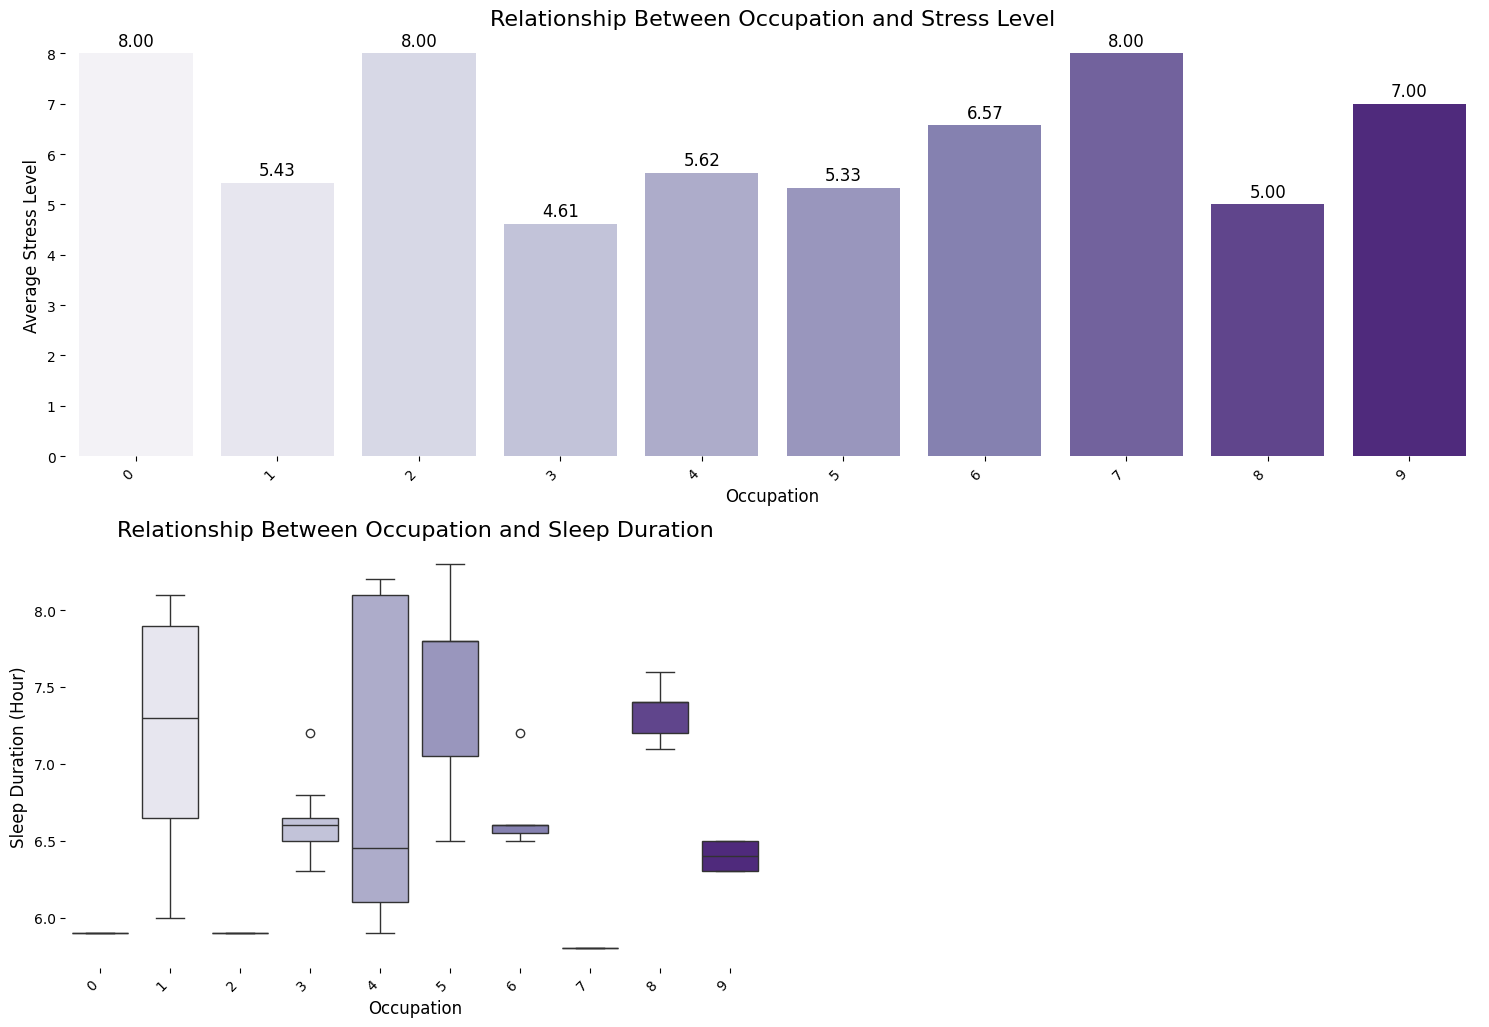

In [13]:
# Inisialisasi figure
fig = plt.figure(figsize=(15, 15), facecolor='white')

# Membuat subplot dengan grid
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
ax2 = plt.subplot2grid((3, 2), (1, 0), colspan=1)

# Mengatur atribut visual untuk semua axes
for ax in [ax1, ax2]:
    ax.set_facecolor('white')
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(False)

# Membuat barplot untuk ax1
sns.barplot(x='Occupation', y='Stress Level', data=df, estimator=np.mean, errorbar=None, palette='Purples', ax=ax1)
ax1.set_title('Relationship Between Occupation and Stress Level', fontsize=16)
ax1.set_xlabel('Occupation', fontsize=12)
ax1.set_ylabel('Average Stress Level', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Menambahkan anotasi pada barplot
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black',
                 xytext=(0, 9), textcoords='offset points')

# Membuat boxplot untuk ax2
sns.boxplot(x='Occupation', y='Sleep Duration', data=df, palette='Purples', ax=ax2)
ax2.set_title('Relationship Between Occupation and Sleep Duration', fontsize=16)
ax2.set_xlabel('Occupation', fontsize=12)
ax2.set_ylabel('Sleep Duration (Hour)', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()

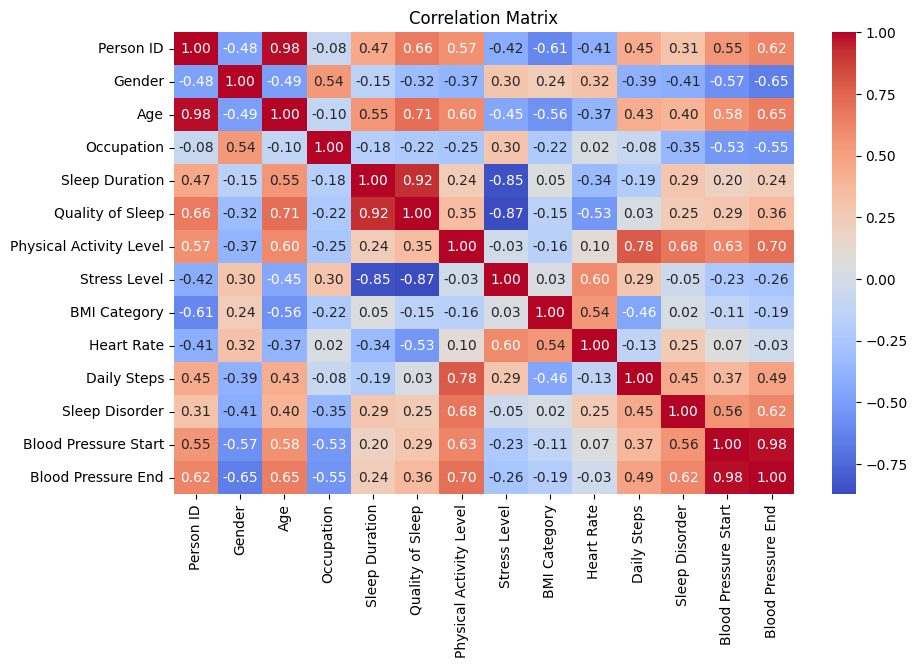

In [14]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()


for col in df.select_dtypes(include=["object"]).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])


plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [15]:
df = df.drop(columns=["Physical Activity Level","Person ID"])

In [16]:
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

In [17]:
X

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Heart Rate,Daily Steps,Blood Pressure Start,Blood Pressure End
3,1,28,2,5.9,4,8,2,85,3000,140,90
4,1,28,2,5.9,4,8,2,85,3000,140,90
5,1,28,0,5.9,4,8,2,85,3000,140,90
6,1,29,3,6.3,6,7,2,82,3500,140,90
16,0,29,4,6.5,5,7,3,80,4000,132,87
...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,4,8.1,9,3,0,68,7000,140,95
370,0,59,4,8.0,9,3,0,68,7000,140,95
371,0,59,4,8.1,9,3,0,68,7000,140,95
372,0,59,4,8.1,9,3,0,68,7000,140,95


In [18]:
le = LabelEncoder()

In [19]:
y = le.fit_transform(y)

In [20]:
y

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [21]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [22]:
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

models = {
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
}

In [31]:
# Train and test all models
for name, model in models.items():
    print(model)
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # prediksi pada data test

    accuracy = accuracy_score(y_test, y_pred)  # kalkulasi akurasi data
    name = accuracy  # Store the results

    print(f"{name} - Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("="*50)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
0.9032258064516129 - Accuracy: 0.9032
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.93      0.88      0.90        16

    accuracy                      

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[14  1]
 [ 3 13]]


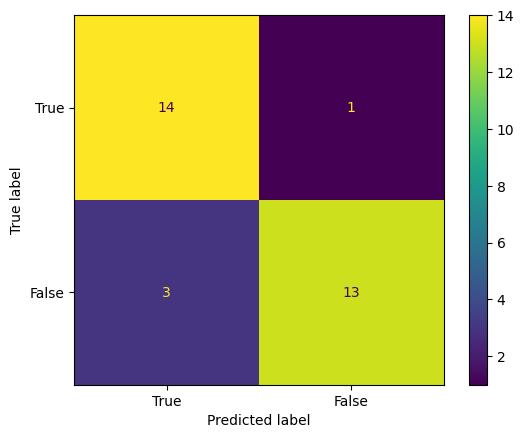

In [33]:
confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[True,False])
confusion_matrix_display.plot()
plt.show()

In [34]:
# Assuming models is defined somewhere
for name, model in models.items():
    print(f"Model: {name}")

    # Define features
    gender = 1   #Male=0, Female=1
    age = 50
    occupation = 2 #Engineer=5
    sleep_duration = 10
    quality_of_sleep = 5
    stress_level = 8
    heart_rate = 75
    daily_steps = 10000
    bmi_category = 1 #Normal=1
    blood_pressure_start = 140
    blood_pressure_end= 90

    # Create a numerical feature array
    X_test = np.array([[gender, age, occupation, sleep_duration, quality_of_sleep,
                        stress_level, heart_rate, daily_steps, bmi_category,blood_pressure_start,blood_pressure_end]])
    print(X_test)
    # Ensure the scaler is already fitted on training data
    scaler = StandardScaler()

    X_test_scaled = scaler.fit_transform(X_test)  # Ideally, use `scaler.transform(X_test)`

    # Make prediction
    y_pred = model.predict(X_test_scaled)
    if y_pred==0:
      hasil='Sleep Apnea'
    else:
      hasil='Insomnia'
    print(f"Prediction: {hasil}")

Model: XGBoost
[[    1    50     2    10     5     8    75 10000     1   140    90]]
Prediction: Sleep Apnea
Model: Naive Bayes
[[    1    50     2    10     5     8    75 10000     1   140    90]]
Prediction: Sleep Apnea
Model: Logistic Regression
[[    1    50     2    10     5     8    75 10000     1   140    90]]
Prediction: Sleep Apnea
Model: Neural Network
[[    1    50     2    10     5     8    75 10000     1   140    90]]
Prediction: Sleep Apnea


In [36]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier

#Fungsi untuk prediksi berdasarkan input
def prediksi(gender, age, occupation, sleep_duration, quality_of_sleep, stress_level, heart_rate, daily_steps, bmi_category, blood_pressure_start,blood_pressure_end,model):
    # Create a numerical feature array
    X_test = np.array([[gender, age, occupation, sleep_duration, quality_of_sleep,
                        stress_level, heart_rate, daily_steps, bmi_category,blood_pressure_start,blood_pressure_end]])
    print(X_test)
    # Ensure the scaler is already fitted on training data
    scaler = StandardScaler()

    X_test_scaled = scaler.fit_transform(X_test)  # Ideally, use `scaler.transform(X_test)`

    # Make prediction
    prediksi = model.predict(X_test_scaled)

    return prediksi

# Define features
gender = 1   #Male=0, Female=1
age = 50
occupation = 2 #Engineer=5
sleep_duration = 10
quality_of_sleep = 5
stress_level = 8
heart_rate = 75
daily_steps = 10000
bmi_category = 1 #Normal=1
blood_pressure_start = 140
blood_pressure_end= 90

  # Prediksi hasil
for name, model in models.items():
  print("Model: ",model)
  hasil_prediksi = prediksi(gender, age, occupation, sleep_duration, quality_of_sleep, stress_level, heart_rate, daily_steps, bmi_category, blood_pressure_start,blood_pressure_end,model)
  if hasil_prediksi==0:
    hasil='Sleep Apnea'
  else:
    hasil='Insomnia'
  print(f'Hasil Prediksi Sleep Disorder: {hasil}')

Model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
[[    1    50     2    10     5     8    75 10000     1   140    90]]
Hasil Prediksi Sleep Disorder: Sleep Apnea
Model:  GaussianNB()
[[    1    50     2    10     5     8    75 10000     1   140    90]]
Hasil Prediksi Sleep Dis

In [ ]:

models = {
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Neural Network": MLPClassifier(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}


In [ ]:

accuracy_scores = {}

# Asumsi X dan y sudah didefinisikan sebelumnya
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi untuk model yang membutuhkannya
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for name, model in models.items():
    if name in ["Logistic Regression", "Neural Network", "SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = model.score(X_test_scaled if name in ["Logistic Regression", "Neural Network", "SVM", "KNN"] else X_test, y_test)
    accuracy_scores[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Peringkat Akurasi
ranking = sorted(accuracy_scores.items(), key=lambda x: x[1], reverse=True)
print("\n=== Model Accuracy Ranking ===")
for i, (name, score) in enumerate(ranking, 1):
    print(f"{i}. {name} - Accuracy: {score:.4f}")



## 🔍 Hyperparameter Tuning with GridSearchCV
Untuk meningkatkan akurasi model, kita bisa melakukan pencarian kombinasi parameter terbaik menggunakan `GridSearchCV`. Di bawah ini kita contohkan untuk **Random Forest** dan **SVM**.


In [ ]:

# GridSearch untuk Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_rf.best_params_)

# GridSearch untuk SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['rbf']
}

grid_svm = GridSearchCV(SVC(probability=True), svm_param_grid, cv=5, n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)
print("Best Parameters for SVM:", grid_svm.best_params_)
